In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from __future__ import division
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
import datetime


In [3]:
data=pd.read_csv(r"C:\Users\Kavyasree P\Downloads\Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [6]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [10]:
for col in data.columns:
    num=data[col].isnull().sum()
    perce=(num/data[col].shape[0])*100
    print (f"{col}:       {perce}%")


Date:       0.0 %
Time:       42.122247532270315 %
Location:       0.3796507213363705 %
Operator:       0.3416856492027335 %
Flight #:       79.707668944571 %
Route:       32.40318906605923 %
Type:       0.5125284738041003 %
Registration:       6.359149582384206 %
cn/In:       23.31055429005315 %
Aboard:       0.4176157934700076 %
Fatalities:       0.22779043280182232 %
Ground:       0.4176157934700076 %
Summary:       7.403189066059225 %


Total Plane Crashes in The Year

In [25]:
data["Date"] = pd.to_datetime(data["Date"])
crashes_per_year=data.groupby(data["Date"].dt.year).size()


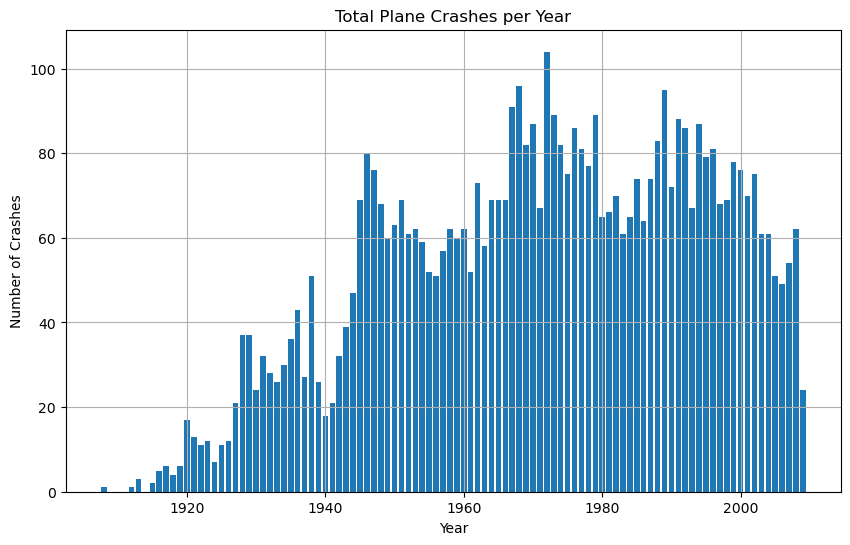

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(crashes_per_year.index, crashes_per_year.values)
plt.title('Total Plane Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

Insights

The number of crashes gradually increased from 1908
Till 1943 the accidents were only confined to 40 or less than that.
After 1944 and upto 1962 the number rapidly increased which were greater than 40 and almost near to 60 crashes.
From 1963 the number increases much more and each year minimum of 60 crashes sarted talking place and the number went till 100+ in the year 1972.
After the advancement of auto-pilot some other major innovations of the air craft, the number started decreasing after 1972, but upto 2004 there were minimum of 60 crashes happening.
The years 2005, 2006, 2007 had minimum of 40 crashes.
After 2009, The numbers are drastically low, because of the capabilities of the modern aircraft.

Crashes per month and 24 hours

crashes_per_year=data.groupby(data["Date"].dt.month).size()
crashes_per_year=data.groupby(data["Date"].dt.year).size()

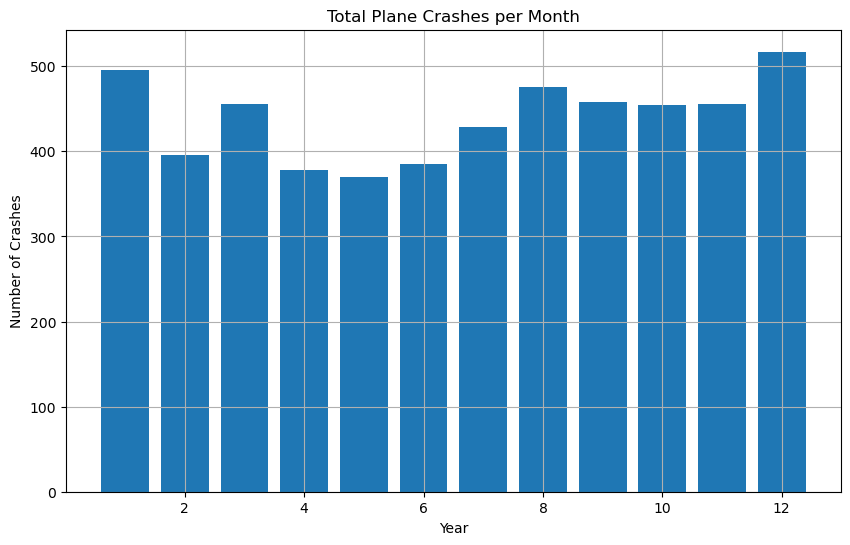

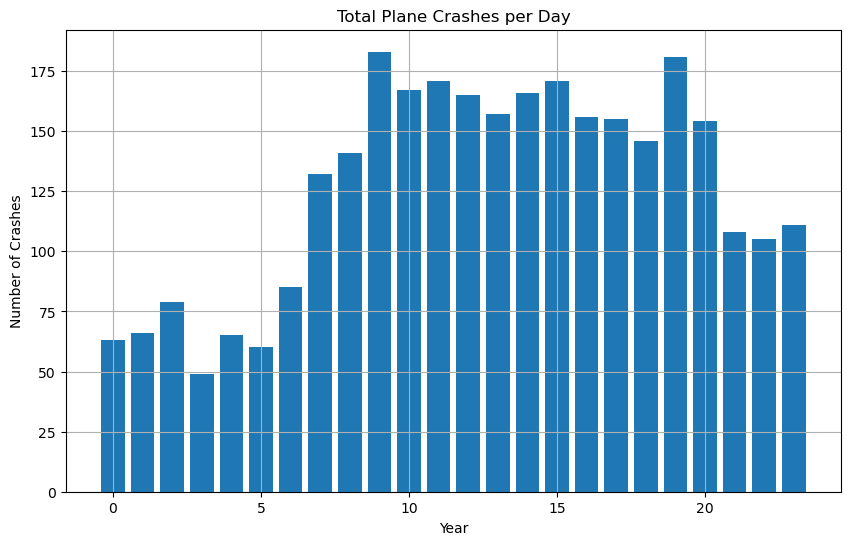

In [36]:
crashes_per_month=data.groupby(data["Date"].dt.month).size()
data["Time"] = pd.to_datetime(data["Time"],errors="coerce")

crashes_per_day=data.groupby(data["Time"].dt.hour).size()
plt.figure(figsize=(10, 6))
plt.bar(crashes_per_month.index, crashes_per_month.values)
plt.title('Total Plane Crashes per Month')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(crashes_per_day.index, crashes_per_day.values)
plt.title('Total Plane Crashes per Day')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

December months have more number of crashes with more than 500+ crashes.
January months have the second highest month with crashes nearly 500.
March, July, August, September, October, November have more than 400+ crashes.
February, April, May, June have more than 300+ crashes.

Most of the crashes occur between 9AM to 8PM which are actually the most busy hours in a day.

Total number of people aboard the flight, number of people survived in flight and fatalities occured

In [39]:
data[["Aboard","Fatalities"]].dropna()[data["Fatalities"] > data["Aboard"]]
data["Survivors"] = data["Aboard"] - data["Fatalities"]
# calculating the total number of survived and fatalaties for each year

aboard_fatalities = data.pivot_table(values=["Aboard","Survivors","Fatalities"],index=data["Date"].dt.year,aggfunc=np.sum)
pd.set_option('display.max_rows', None)
print(aboard_fatalities)

      Aboard  Fatalities  Survivors
Date                               
1908     2.0         1.0        1.0
1912     5.0         5.0        0.0
1913    51.0        45.0        6.0
1915    60.0        40.0       20.0
1916   109.0       108.0        1.0
1917   124.0       124.0        0.0
1918    65.0        65.0        0.0
1919     5.0         5.0        0.0
1920    31.0        24.0        7.0
1921    69.0        68.0        1.0
1922    91.0        80.0       11.0
1923    80.0        77.0        3.0
1924    18.0        18.0        0.0
1925    68.0        39.0       29.0
1926    45.0        30.0       15.0
1927    73.0        54.0       19.0
1928   134.0       124.0       10.0
1929   152.0       119.0       33.0
1930   176.0       138.0       38.0
1931   113.0        94.0       19.0
1932    87.0        75.0       12.0
1933   212.0       192.0       20.0
1934   162.0       126.0       36.0
1935   273.0       226.0       50.0
1936   312.0       227.0       85.0
1937   331.0       203.0    

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\3096772364.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[["Aboard","Fatalities"]].dropna()[data["Fatalities"] > data["Aboard"]]
C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\3096772364.py:5: FutureWarning: The provided callable <function sum at 0x000001A5987471A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aboard_fatalities = data.pivot_table(values=["Aboard","Survivors","Fatalities"],index=data["Date"].dt.year,aggfunc=np.sum)


Fatilities are more than survivours in all the years from 1908 to 2009
It is inevitable that whatever measure a we talk to protect as much as people aboard, the fatilities will be always greater than the surviviours.
So what every measures had to be taken and the flights has to be maintained properly with good training to the pilots.

Finding the highest number of crashes by individual operators

In [40]:
# operators with highest number of fatalities

top_df = data.pivot_table(values="Fatalities",index="Operator",aggfunc=np.sum).sort_values(by="Operator", ascending=False).head(10)

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\2071815096.py:3: FutureWarning: The provided callable <function sum at 0x000001A5987471A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top_df = data.pivot_table(values="Fatalities",index="Operator",aggfunc=np.sum).sort_values(by="Operator", ascending=False).head(10)


C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\4084562661.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis1.set_xticklabels(data["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)


Text(0.5, 1.0, 'Operators with highest number of crashes')

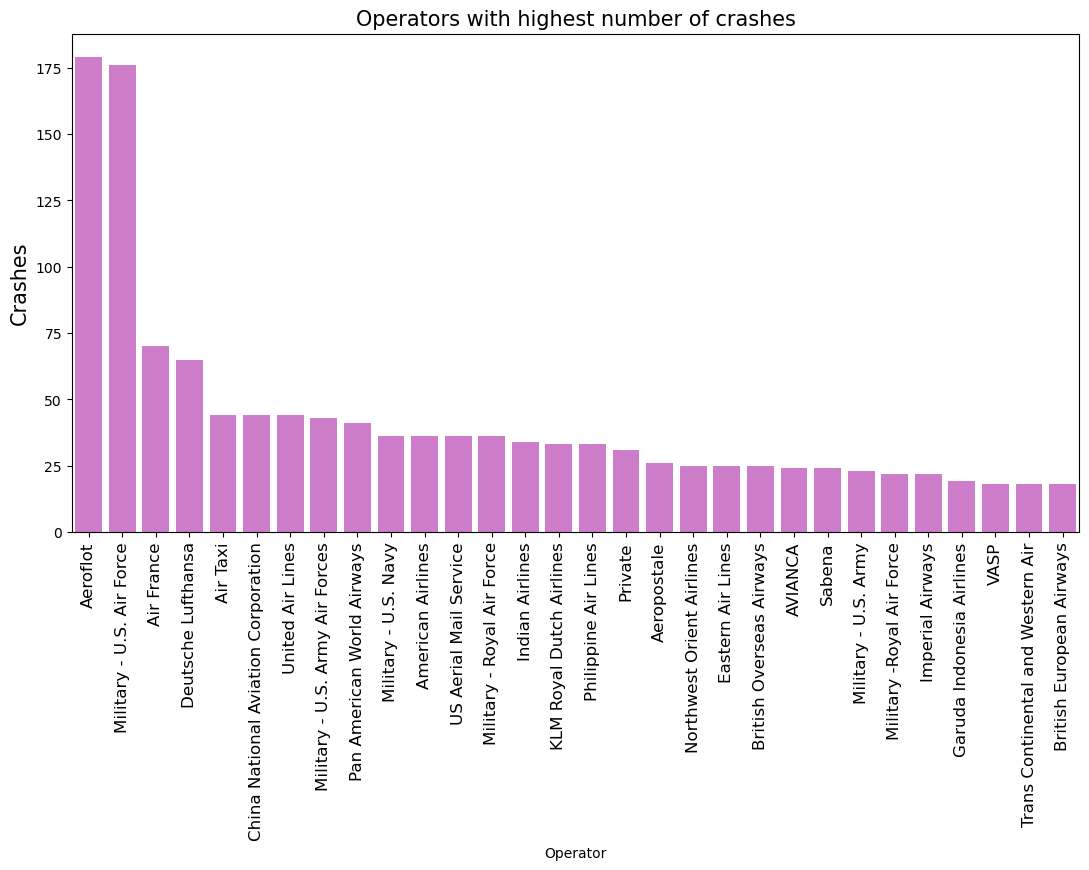

In [41]:
# plotting the operators with highest number of crashes

figure = plt.figure(figsize=(13,22))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=data["Operator"].value_counts().head(30).index,y=data["Operator"].value_counts().head(30).values,ax=axis1,
            color='orchid')
axis1.set_ylabel("Crashes",fontsize=15)
axis1.set_xticklabels(data["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)
axis1.set_title("Operators with highest number of crashes",fontsize=15)

It is very unsafe to fly with "Aeroflot", which is a Russian airline. It has more than 175 crashes which is very deadliest.
Air France and Lufthansa are also having greater than 50 crashes.
This means the airline is either not maintining the flights properly or hiring pilots who are not properly trained.
Even the US Military and Army forces are also having more crashes.
Nearly 21 airlines have atleast 25 crashes which took place. It's better to avoid these airlines to fly.

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\2118657810.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis2.set_xticklabels(data["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)


Text(0.5, 1.0, 'Operators with highest number of Fatalities')

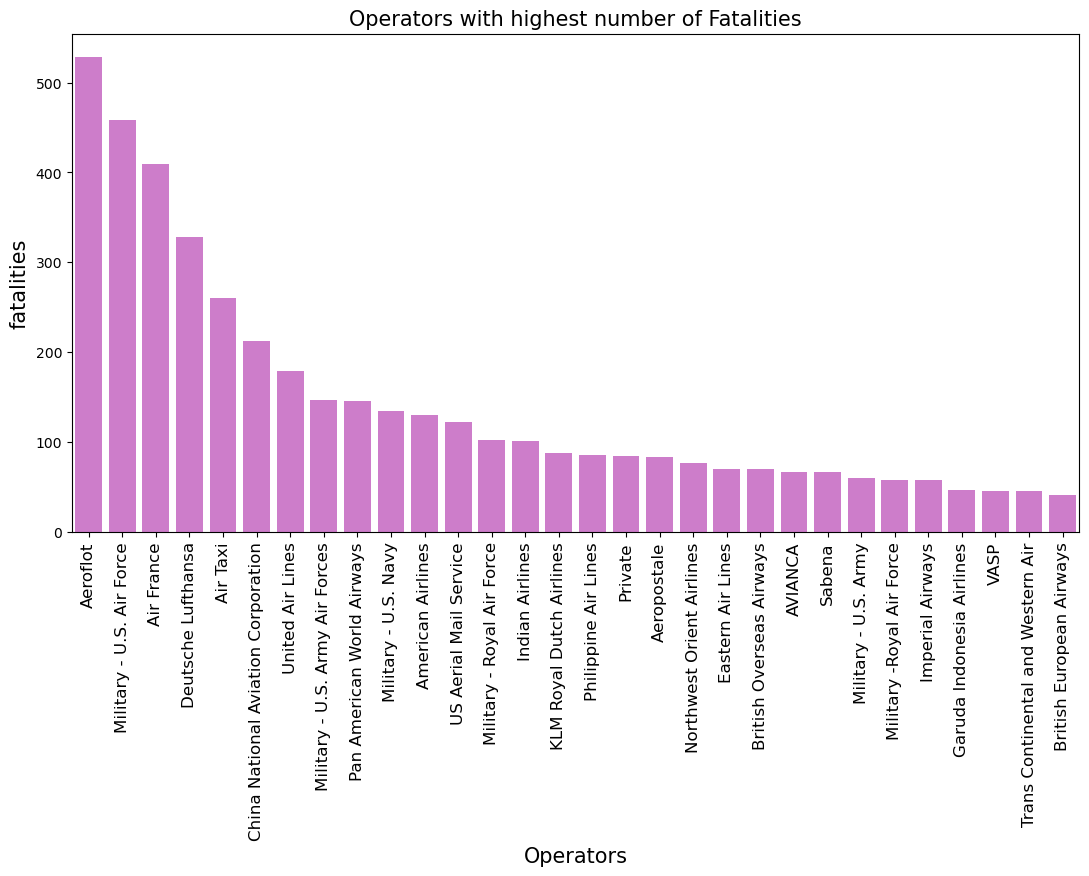

In [42]:
# plotting the operators with highest number of fatalities

figure = plt.figure(figsize=(13,22))
axis2 = figure.add_subplot(3,1,1)
sns.barplot(x=data["Operator"].value_counts().head(30).index,y=data["Fatalities"].value_counts().head(30).values,ax=axis2,
            color='orchid')
axis2.set_ylabel("fatalities",fontsize=15)
axis2.set_xlabel("Operators",fontsize=15)
axis2.set_xticklabels(data["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)
axis2.set_title("Operators with highest number of Fatalities",fontsize=15)

As we can tell by looking at the number of crashes, that flying with Aeroflot has killed more than 500+ people.
It is then followed by Air France, that has killed 400+ of people.
It is then followed by Lufthansa, that has killed 320+ of people.
Many US Air Force Military people nearly 400+ have also died.
There are 14 airlines which has killed atleast 100 people aboard. It's very unsafe to fly with them.

In [44]:
operator = data[["Operator","Fatalities"]].groupby("Operator").agg(["sum","count"])
operator.head()

Fatalities      
                         sum count
Operator                          
A B Aerotransport        3.0     2
AB Aerotransport        58.0     3
ACES Colombia           40.0     3
ADC Airlines            97.0     2
ADES Colombia           22.0     2

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\3988505849.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis1.set_xticklabels(data["Type"].value_counts().head(30).index,rotation=90,fontsize=12)


Text(0.5, 1.0, 'Air Craft type with highest number of crashes')

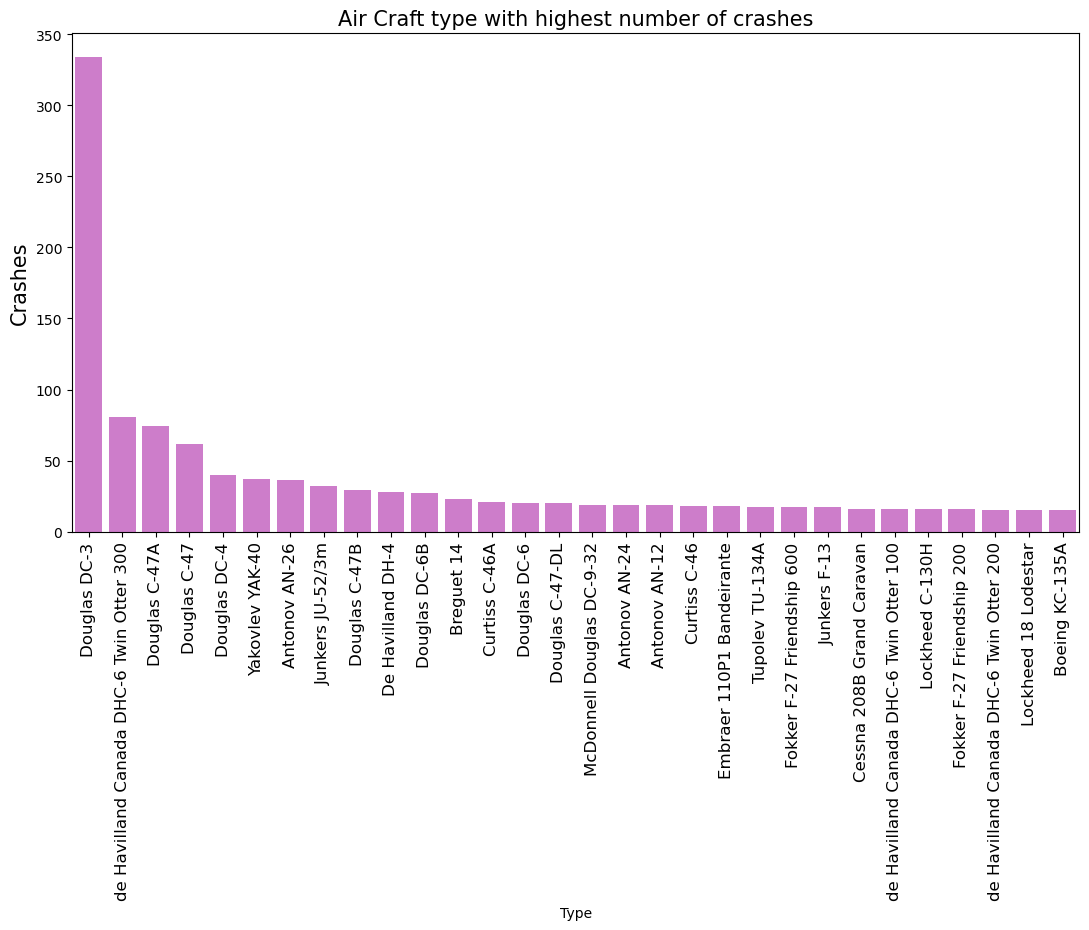

In [45]:
# plotting aircrafts with highest number of crashes

figure = plt.figure(figsize=(13,22))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=data["Type"].value_counts().head(30).index,y=data["Type"].value_counts().head(30).values,ax=axis1,
            color='orchid')
axis1.set_ylabel("Crashes",fontsize=15)
axis1.set_xticklabels(data["Type"].value_counts().head(30).index,rotation=90,fontsize=12)
axis1.set_title("Air Craft type with highest number of crashes",fontsize=15)

More than 300+ of Douglas DC-3s have crashed. This is widely used by military people.
Aircraft manufactured by companies like Douglas, De Havilland Canada, Antonov, Junckers, Fokkers are more prone to be crashed

Finding the main reasons for a flight to Crash

In [54]:
import textblob
stringText = textblob.TextBlob(str(list(data["Summary"]))).lower()
words = stringText.words
wordCount = {}
ignore = ['a', 'an', 'the', "'the", 'and', 'to', 'of', 'in', 'into', 'is', 'was', 'on', 'at', 'from', 'with',
          'while', 'for', "'s", 'as', 'not', 'by', 'after', 'during']

for word in words:
    if word in ignore:
        continue
    if word in wordCount:
        wordCount[word] = wordCount[word] + 1
    else:
        wordCount[word] = 1
import operator
sorted_word = sorted(wordCount.items(), key=operator.itemgetter(1), reverse=True)[:500]
with open("sorted_wordcount.txt", "w") as f:f.write(str(sorted_word))

In [53]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Kavyasree
[nltk_data]    |     P\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Kavyasree
[nltk_data]    |     P\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Kavyasree P\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Kavyasree P\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Kavyasree P\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzippin

True

In [56]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Kavyasree
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kavyasree P\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Kavyasree
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
# 6 Major Reasons of Airplane Crash After complete analysis of sorted_wordcount.txt and word frequency

reasons = ['weather', 'fire', 'shot down', 'stall/runway', 'pilot/crew error', 'systems failure']

In [58]:
expresion = ['((poor|bad).*(weather|visibility)|thunderstorm|fog)','(caught fire)|(caught on fire)', 
           '(shot down) | (terrorist) | (terrorism)', '(stall)|(runway)', '(pilot|crew) (error|fatigue)',
            '(engine.*(fire|fail))|(structural fail)|(fuel leak)|(langing gear)|(turbulence)|(electrical)|(out of fuel)|(fuel.*exhaust)']

In [59]:
data['Label'] = pd.Series(np.nan, index=data.index)
data.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survivors,Label
0,1908-09-17,2024-08-11 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,NaN
1,1912-07-12,2024-08-11 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,NaN
2,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,NaN
3,1913-09-09,2024-08-11 18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,NaN
4,1913-10-17,2024-08-11 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,NaN


In [60]:
# Creation of train dataset

trainData = []
for x in range(len(data)):
    if data.loc[x,"Summary"] is np.nan:
        data.loc[x,"Label"] = "unknown"
    else:
        for y in range(len(expresion)):
            if re.search(expresion[y], data.loc[x,"Summary"].lower()):
                data.loc[x,"Label"] = reasons[y]
                temp = data.loc[x,"Summary"].lower(), data.loc[x,"Label"]
                trainData.append(temp)
                break
# Building of Naive Bayes Classifer

from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(trainData)

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_10564\198197289.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'weather' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[x,"Label"] = reasons[y]


In [62]:
reasons.append("unknown")
for x in range(30,len(data)):
    if data.loc[x,"Label"] in reasons:
        continue
    else:
        data.loc[x,"Label"] = cl.classify(data.loc[x,"Summary"])
data.to_csv('labelled.csv')

Airplane Crashes by Label

array([<Axes: ylabel='Fatalities'>], dtype=object)

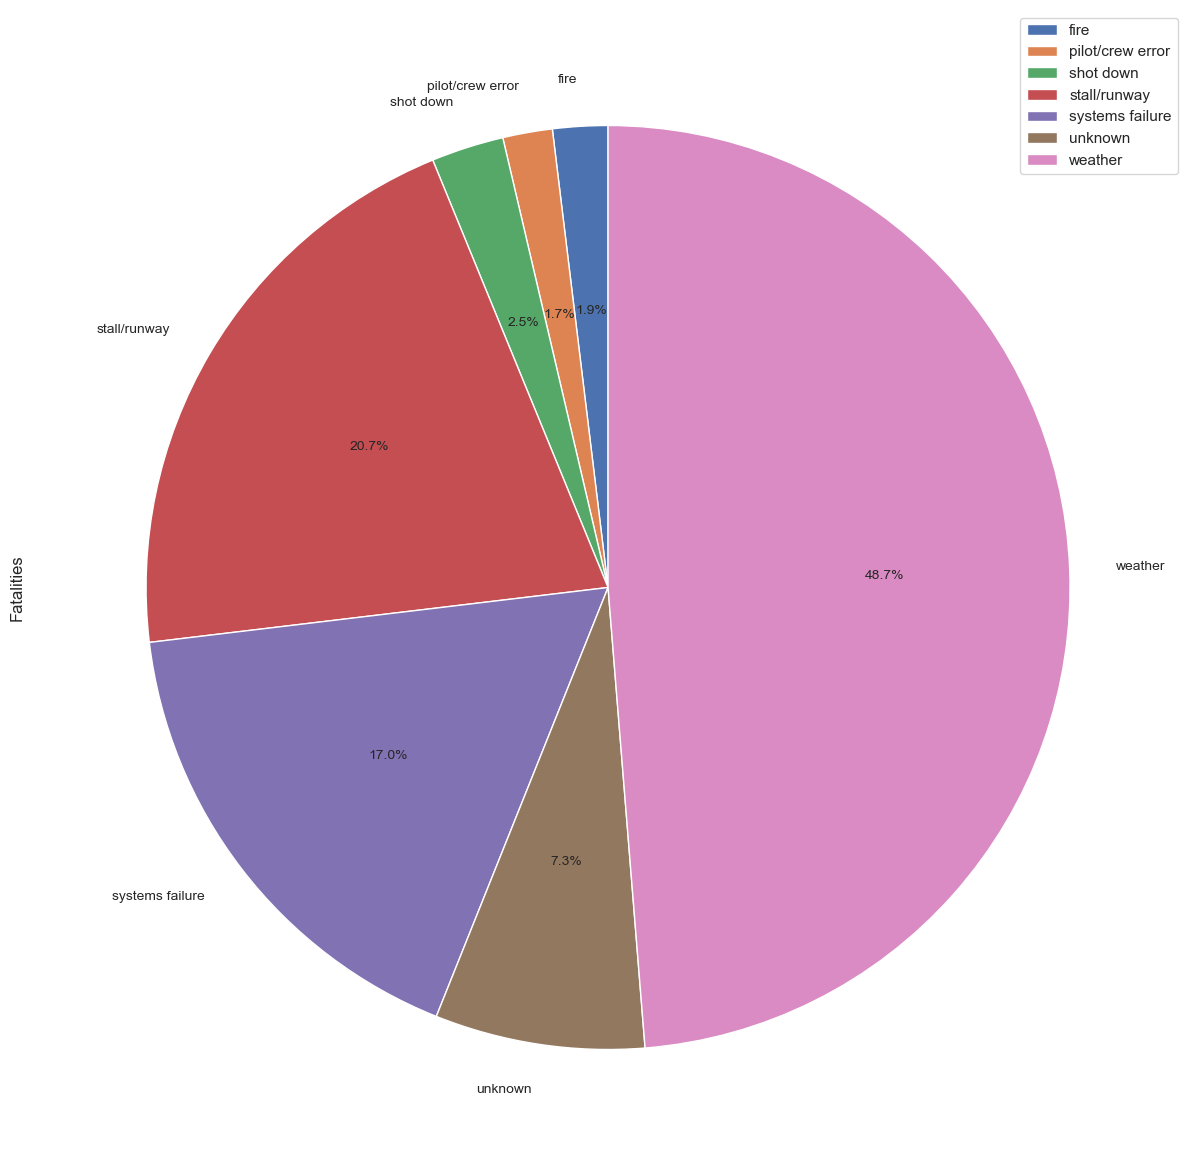

In [63]:
label = data.loc[:,["Fatalities","Label"]].groupby("Label").count()
label.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

48.7% of the aircraft crashes are because of the Weather Conditions.
20.7% of the aircraft crashes are due to either the aircrafts stalling, or overrunning the runway.
17% of the aircraft crashes are due to systems failure in the aircraft.
2.5% of the aircraft crashes are due to shot down by the government/others.
1.9% of the aircraft crashes are due to fire onboard.
1.7% of the aircraft crashes are due to the pilot/crew error.
So, It's better not to travel during extreme weather conditions like heavy rain or snow fall, or storms etc.

array([<Axes: ylabel='Fatalities'>], dtype=object)

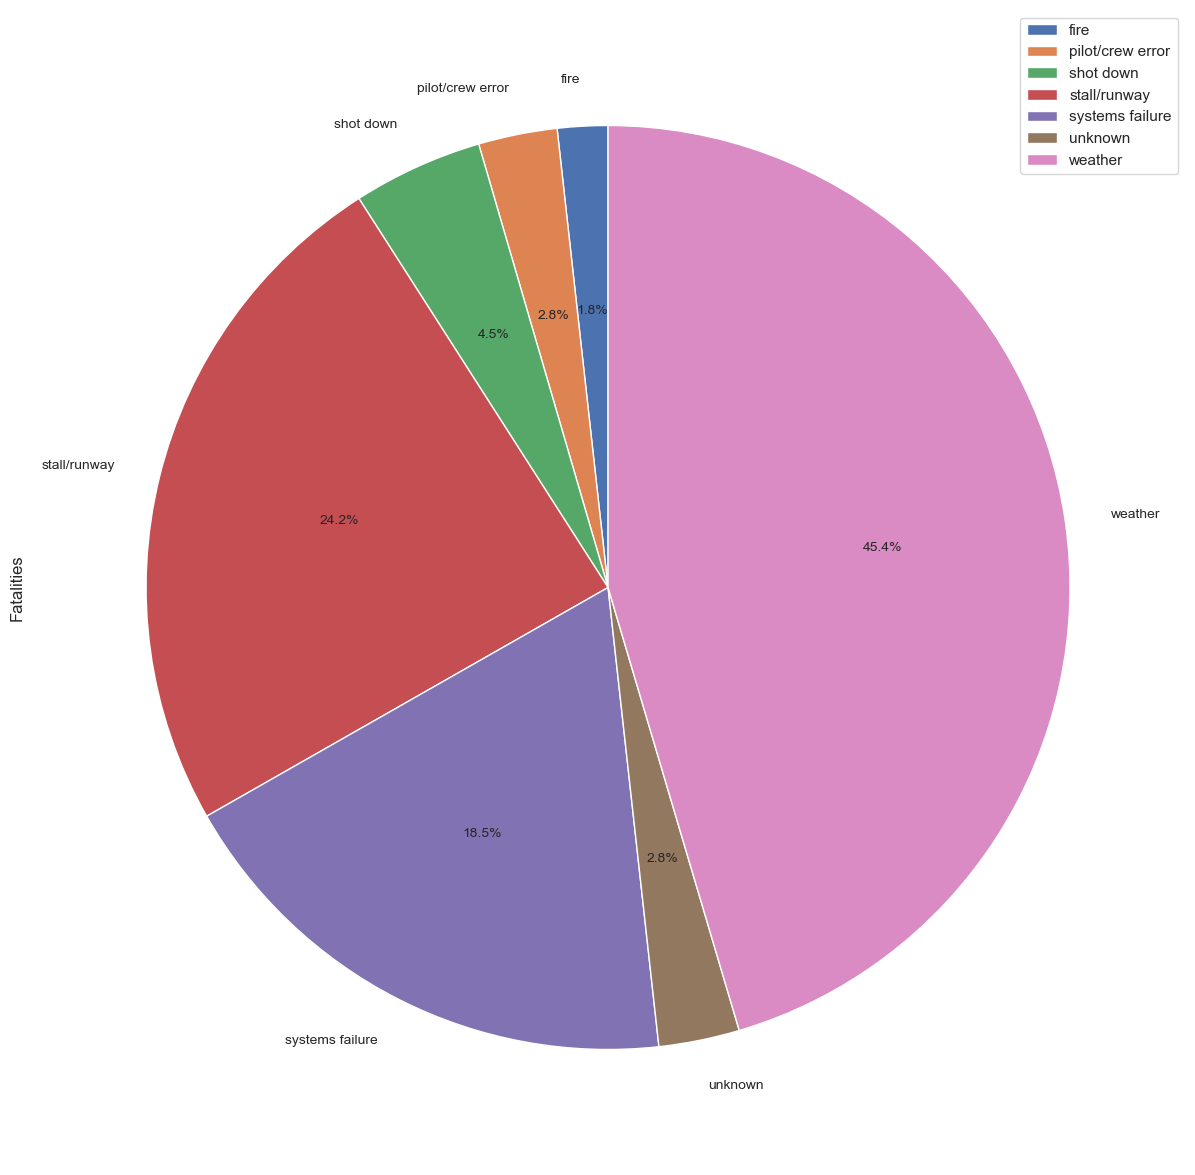

In [64]:
fatalitiesByLabel = data.loc[:,["Fatalities","Label"]].groupby("Label").sum()
fatalitiesByLabel.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

As we can tell from findings-9 pie chart and the above pie chart, more fatilities occur when there is a bad weather, which is then followed by stall/ overrunning the runway, systems failure, shotdown, pilot/crew error, fire onboard.

We can't control any other option except postponing the travel on a extremely bad weather day.

Finding if there is any relation between the Airports and Air Crashes
According to a study, 49% of all fatal accidents happen during the final descent and landing phases of the average flight, while 14% of all fatal accidents happen during takeoff and initial climb. Because during takeoff and landing, pilots have less time to react to problems because they're on or close to the ground and moving quickly.

In [65]:
routes=data['Route']
routes=routes.dropna().str.lower().str.replace(" ", "").str.split("-")
routes=routes[routes.str.len()==2]
dept2Dest=pd.DataFrame({'Departure': routes.str.get(0), 'Destination': routes.str.get(1)})

Text(0, 0.5, 'Number of Crash')

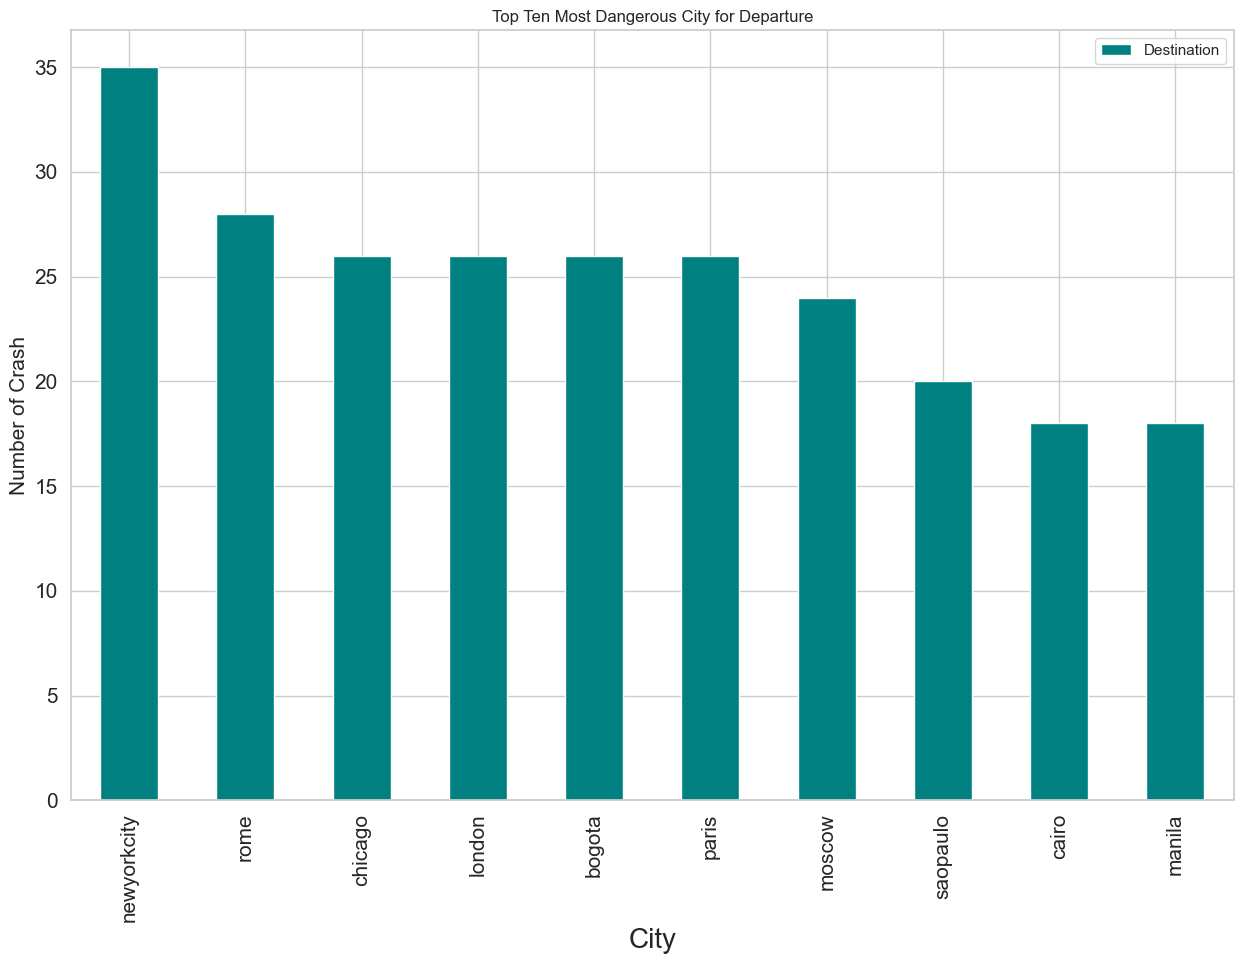

In [66]:
departure = dept2Dest.groupby(['Departure']).count().sort_values(by="Destination", ascending=False).head(10)
plot= departure.plot.bar(figsize=(15,10), title="Top Ten Most Dangerous City for Departure", fontsize=15,color="teal")
plot.set_xlabel("City", fontsize=20)
plot.set_ylabel("Number of Crash", fontsize=15)

The fatal accidents that happen during takeoff and initial climb, are mostly when the air craft took off from New York City, which is then followed by Rome, Chicago, London, Bogota, Paris, Mascow, Saopaulo, Cairo, Manila Airports.

Airlines and pilots should be very vigilant.

Text(0, 0.5, 'Number of Crash')

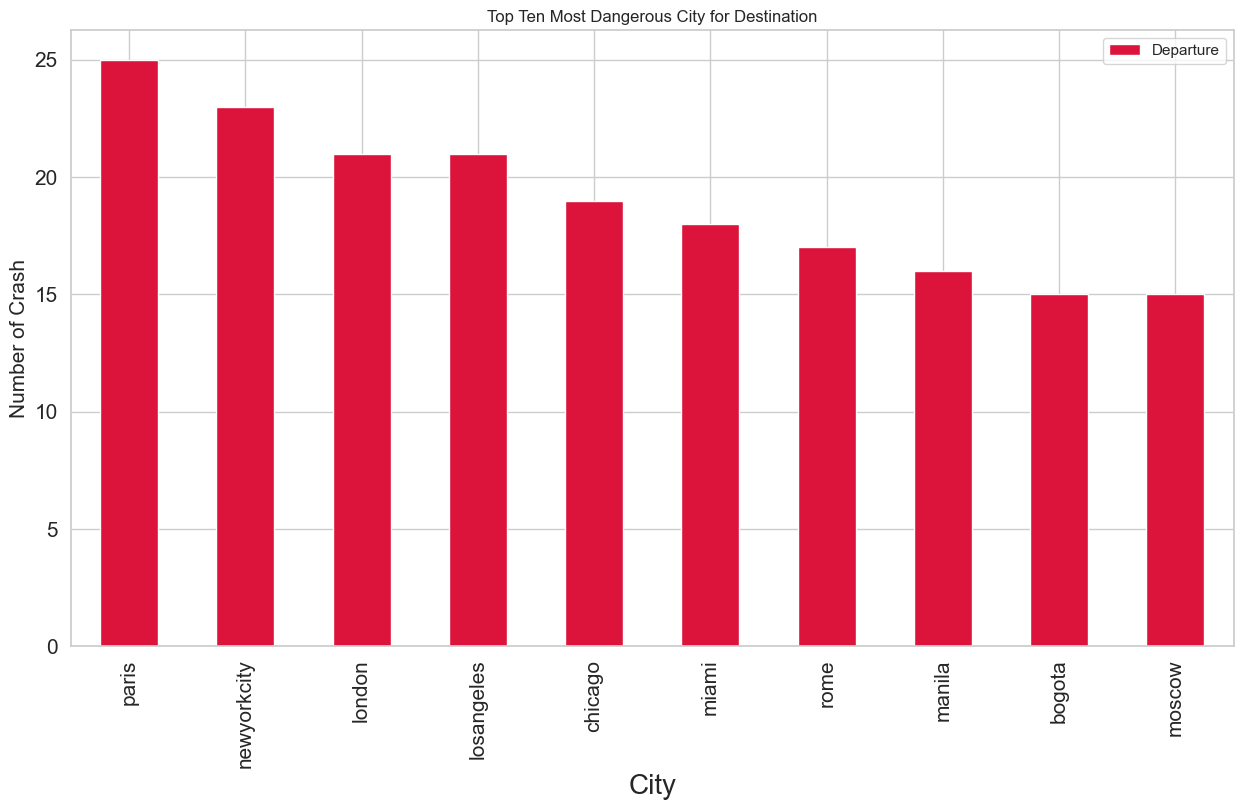

In [67]:
destination = dept2Dest.groupby(['Destination']).count().sort_values(by="Departure", ascending=False).head(10)
plot= destination.plot.bar(figsize=(15,8), title="Top Ten Most Dangerous City for Destination", fontsize=15,color="crimson")
plot.set_xlabel("City", fontsize=20)
plot.set_ylabel("Number of Crash", fontsize=15)

The fatal accidents happen during the final descent and landing phases are mostly from the Miami Airport, which is then followed by New York City, London, Los Angeles, Chicago, Miami, Rome, Bogota, Mascow.